<a href="https://colab.research.google.com/github/SakshamDataWizard/Food-wastage-system/blob/main/Voice_recognition_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, classification_report,
                             silhouette_score, confusion_matrix)
from sklearn.decomposition import PCA
import joblib
from google.colab import files

In [4]:
df = pd.read_csv('human_voice_clustering.csv')
print("Dataset shape:", df.shape)

Dataset shape: (16148, 44)


In [5]:
df.dropna(inplace=True)
print("Shape after handling missing values:", df.shape)


Shape after handling missing values: (16148, 44)


In [6]:
X = df.drop('label', axis=1)
y = df['label']


In [7]:
# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Dimensionality Reduction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Reduced dimensions:", X_pca.shape[1])

Reduced dimensions: 26


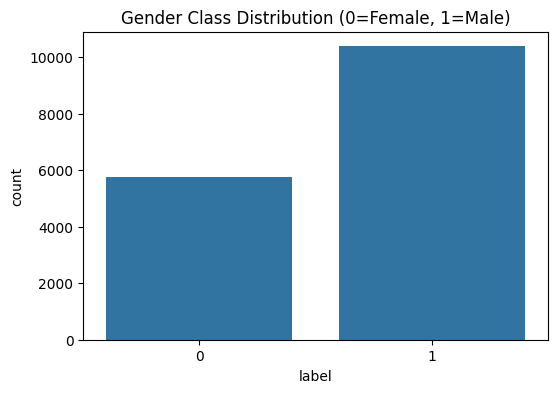

In [9]:
# ## Exploratory Data Analysis (EDA)

# %%
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Gender Class Distribution (0=Female, 1=Male)')
plt.show()

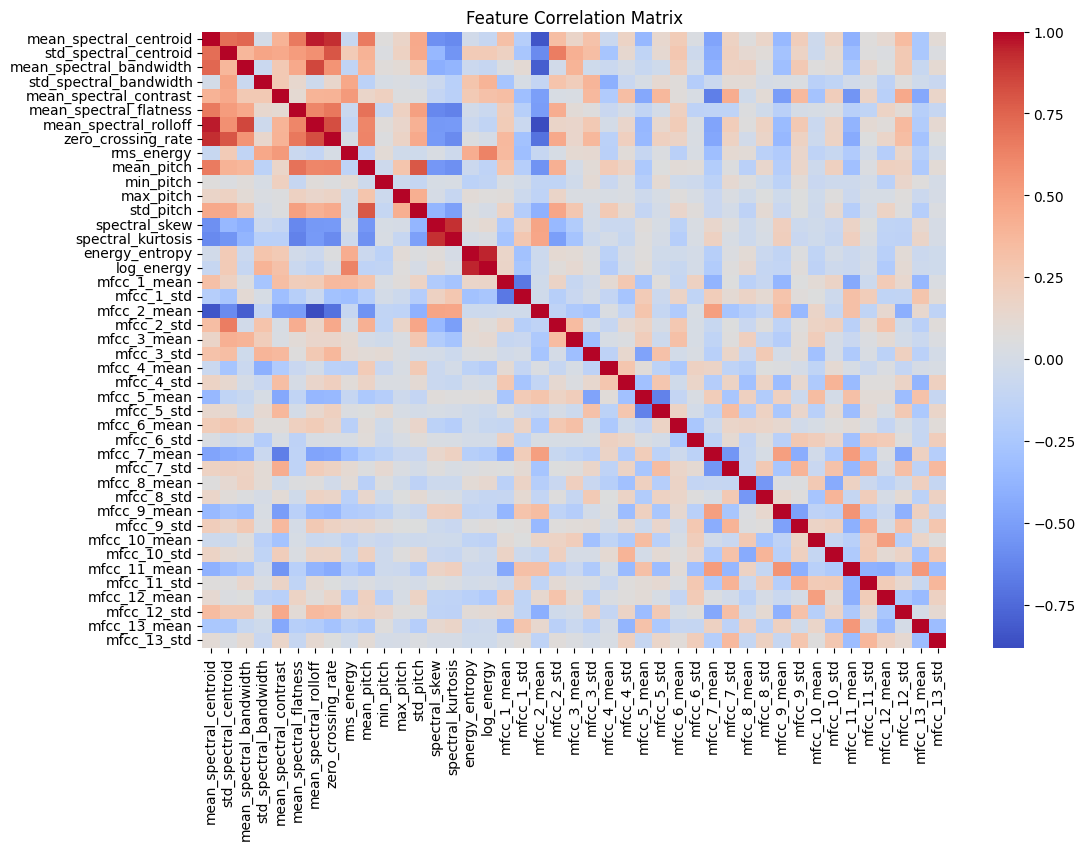

In [10]:
# Plot feature correlation
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [11]:
# ## Model Training & Evaluation

# %%
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [13]:
# Classification Models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32))
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



=== Random Forest ===
Accuracy: 0.9938
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1163
           1       0.99      1.00      1.00      2067

    accuracy                           0.99      3230
   macro avg       0.99      0.99      0.99      3230
weighted avg       0.99      0.99      0.99      3230


=== SVM ===
Accuracy: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230


=== Neural Network ===
Accuracy: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg     

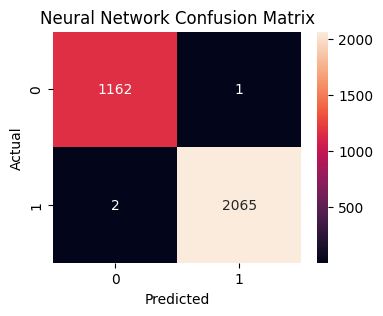

In [14]:
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [15]:
# %%
# Save Best Model
joblib.dump(models["Random Forest"], 'voice_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [16]:
# Download models to local machine
files.download('voice_classifier.pkl')
files.download('scaler.pkl')
files.download('pca.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# ## Clustering Analysis

# %%
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

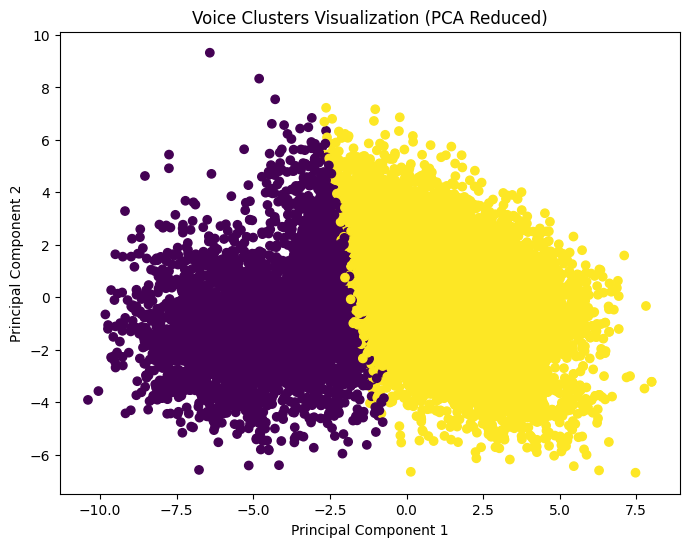

In [18]:
# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Voice Clusters Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
# Silhouette Score
print(f"Silhouette Score: {silhouette_score(X_pca, cluster_labels):.4f}")


Silhouette Score: 0.1835


In [20]:
# ## Prediction Example

# %%
# Load saved components
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
model = joblib.load('voice_classifier.pkl')


In [21]:
sample_data = pd.DataFrame([X.iloc[0].values])
sample_scaled = scaler.transform(sample_data)
sample_pca = pca.transform(sample_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Make prediction
prediction = model.predict(sample_pca)
print(f"Predicted Gender: {'Male' if prediction[0] == 1 else 'Female'}")


Predicted Gender: Female


In [23]:
!pip install streamlit pyngrok --quiet
!npm install -g localtunnel --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 2s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [25]:
%%writefile voice_recognition_app.py
import streamlit as st
import pandas as pd
import joblib
from google.colab import files

# Load models (upload your .pkl files first)
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
model = joblib.load('voice_classifier.pkl')

st.title('🎤 Voice Classification in Colab')
st.markdown("""
**Instructions:**
1. Upload CSV file with voice features
2. Get instant gender predictions
3. Format must match training data
""")

uploaded_file = st.file_uploader("human_voice_clustering", type="csv")

if uploaded_file:
    try:
        df = pd.read_csv('human_voice_clustering.csv')
        if 'label' in df.columns:
            df = df.drop('label', axis=1)

        # Preprocess
        scaled = scaler.transform(df)
        pca_data = pca.transform(scaled)

        # Predict
        preds = model.predict(pca_data)
        results = pd.DataFrame({
            'Prediction': preds,
            'Gender': ['Male' if x == 1 else 'Female' for x in preds]
        })

        st.success("Success!")
        st.write("## Results")
        st.dataframe(results)

        # Show features
        st.write("### Input Features")
        st.dataframe(df.head(3))

    except Exception as e:
        st.error(f"Error: {str(e)}")

# %%
# Upload model files first
print("/content/pca.pkl","/content/scaler.pkl","/content/voice_classifier.pkl")
files.upload()



Overwriting voice_recognition_app.py


In [30]:
!pip install streamlit pandas


In [31]:
!wget -q -O - ipv4.icanhazip.com

34.85.182.46


In [33]:
! streamlit run voice_recognition_app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.182.46:8501

your url is: https://spotty-views-shake.loca.lt
/content/pca.pkl /content/scaler.pkl /content/voice_classifier.pkl
<IPython.core.display.HTML object>
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  121 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:648 in code_to_exec                                                               
                                                                                        
  /content/voice_recognition_app.py:52 in <mod